In [ ]:
import findspark
findspark.init()
import random
import pyspark

In [ ]:
import os

config = # config setting

ss = pyspark.sql.SparkSession.builder.config(conf = config).getOrCreate()
sc = ss.sparkContext

randomly select 20 files out of total 1000 files as our dataset

In [ ]:
sample = []
for i in random.sample(range(1000), 20):
    start = int( str(i)+'000' )
    file = 'mpd.slice.' + str(start) + '-' + str(start+999) + '.json'
    sample.append(file)

In [ ]:
# sample = ['mpd.slice.332000-332999.json',
#           'mpd.slice.557000-557999.json',
#           'mpd.slice.199000-199999.json',
#           'mpd.slice.998000-998999.json',
#           'mpd.slice.770000-770999.json',
#           'mpd.slice.880000-880999.json',
#           'mpd.slice.431000-431999.json',
#           'mpd.slice.132000-132999.json',
#           'mpd.slice.198000-198999.json',
#           'mpd.slice.501000-501999.json',
#           'mpd.slice.139000-139999.json',
#           'mpd.slice.377000-377999.json',
#           'mpd.slice.884000-884999.json',
#           'mpd.slice.191000-191999.json',
#           'mpd.slice.875000-875999.json',
#           'mpd.slice.650000-650999.json',
#           'mpd.slice.391000-391999.json',
#           'mpd.slice.618000-618999.json',
#           'mpd.slice.906000-906999.json',
#           'mpd.slice.851000-851999.json']

## data preprocessing

In [ ]:
import json
import pandas as pd
from pyspark.sql.types import *

In [ ]:
file_paths = ['/scratch/ISE495/2020_project_03/team-3/mpd.slice.332000-332999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.557000-557999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.199000-199999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.998000-998999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.770000-770999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.880000-880999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.431000-431999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.132000-132999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.198000-198999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.501000-501999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.139000-139999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.377000-377999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.884000-884999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.191000-191999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.875000-875999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.650000-650999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.391000-391999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.618000-618999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.906000-906999.json',
              '/scratch/ISE495/2020_project_03/team-3/mpd.slice.851000-851999.json']

In [ ]:
DF = pd.DataFrame()
for file in file_paths:
  data = json.load(open(file))
  DF = pd.concat([DF,pd.DataFrame.from_dict(data['playlists'])])

In [ ]:
DF.shape

(20000, 12)

In [ ]:
DF.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,cg,false,332000,1508284800,116,84,1,"[{'pos': 0, 'artist_name': 'Dustin Lynch', 'tr...",35,25061399,44,they all whipped
1,🇺🇸,false,332001,1436140800,38,37,3,"[{'pos': 0, 'artist_name': 'Toby Keith', 'trac...",5,8626785,27,NaN
2,work,false,332002,1504137600,79,41,1,"[{'pos': 0, 'artist_name': 'Elizabeth Mitchell...",6,15095666,28,NaN
3,pick me up,false,332003,1499990400,43,15,1,"[{'pos': 0, 'artist_name': 'Kings Kaleidoscope...",12,10429308,9,NaN
4,playlist,false,332004,1505779200,146,101,1,"[{'pos': 0, 'artist_name': 'Ed Sheeran', 'trac...",12,34228482,29,NaN


convert pd dataframe to spark df

In [ ]:
schema = StructType([StructField('name',StringType()),
                     StructField('collaborative',StringType()),
                     StructField('pid',StringType()),
                     StructField('modified_at',IntegerType()),
                     StructField('num_tracks',IntegerType()),
                     StructField('num_albums',IntegerType()),
                     StructField('num_followers',IntegerType()),
                     StructField('tracks',ArrayType(MapType(StringType(),StringType()))),
                     StructField('num_edits',IntegerType()),
                     StructField('duration_ms',IntegerType()),
                     StructField('num_artists',IntegerType()),
                     StructField('description',StringType())])
DF2 = ss.createDataFrame(DF,schema)

In [ ]:
DF2.show(10)

+----------------+-------------+------+-----------+----------+----------+-------------+--------------------+---------+-----------+-----------+----------------+
|            name|collaborative|   pid|modified_at|num_tracks|num_albums|num_followers|              tracks|num_edits|duration_ms|num_artists|     description|
+----------------+-------------+------+-----------+----------+----------+-------------+--------------------+---------+-----------+-----------+----------------+
|              cg|        false|332000| 1508284800|       116|        84|            1|[[duration_ms -> ...|       35|   25061399|         44|they all whipped|
|            🇺🇸|        false|332001| 1436140800|        38|        37|            3|[[duration_ms -> ...|        5|    8626785|         27|             NaN|
|            work|        false|332002| 1504137600|        79|        41|            1|[[duration_ms -> ...|        6|   15095666|         28|             NaN|
|      pick me up|        false|332003| 14

In [ ]:
# convert df to rdd
RDD = DF2.rdd.map(lambda x: x.asDict())
RDD.take(1)

[{'name': 'cg',
  'collaborative': 'false',
  'pid': '332000',
  'modified_at': 1508284800,
  'num_tracks': 116,
  'num_albums': 84,
  'num_followers': 1,
  'tracks': [{'duration_ms': '194893',
    'artist_uri': 'spotify:artist:1dID9zgn0OV0Y8ud7Mh2tS',
    'artist_name': 'Dustin Lynch',
    'pos': '0',
    'album_name': 'Current Mood',
    'track_uri': 'spotify:track:7pxhKtuTwofDIdgHx2DcVK',
    'album_uri': 'spotify:album:23cuZhPWDfX1uKD4qwuv7t',
    'track_name': "Seein' Red"},
   {'duration_ms': '199746',
    'artist_uri': 'spotify:artist:1n2pb9Tsfe4SwAjmUac6YT',
    'artist_name': 'Jake Owen',
    'pos': '1',
    'album_name': 'American Love',
    'track_uri': 'spotify:track:0O1x2tRm8ZpfDbcpOWZp7z',
    'album_uri': 'spotify:album:5gsWgFeHRxRkIXGXWPiOIW',
    'track_name': 'American Country Love Song'},
   {'duration_ms': '202346',
    'artist_uri': 'spotify:artist:4MoAOfV4ROWofLG3a3hhBN',
    'artist_name': 'Jon Pardi',
    'pos': '2',
    'album_name': 'California Sunrise',
    '

# Initial impression

In [ ]:
#number of playlists
RDD.count()

20000

In [ ]:
#number of tracks
RDD.flatMap(lambda x: x['tracks']).map(lambda x: x['track_uri']).count()

1328284

In [ ]:
#number of unique tracks
RDD.flatMap(lambda x: x['tracks']).map(lambda x: x['track_uri']).distinct().count()

268907

In [ ]:
#number of unique albums 
RDD.flatMap(lambda x: x['tracks']).map(lambda x: x['album_uri']).distinct().count()

123132

In [ ]:
#number of unique artists 
RDD.flatMap(lambda x: x['tracks']).map(lambda x: x['artist_uri']).distinct().count()

51826

In [ ]:
#number of unique titles 
RDD.map(lambda x: x['name']).distinct().count()

10140

In [ ]:
#number of playlists with description
description = RDD.map(lambda s: s["description"]).filter(lambda s: s != "NaN")
description.count()

364

In [ ]:
#avg playlist length in minute
RDD.map(lambda x: x['duration_ms']).mean() / (1000*60)

259.73687567333354

In [ ]:
#top 20 playlist titles
RDD.map(lambda x: (x['name'],1)).reduceByKey(lambda a,b:a+b).sortBy(lambda x: x[1], ascending=False).take(20)

[('Chill', 111),
 ('Rap', 104),
 ('Rock', 102),
 ('Oldies', 91),
 ('Christmas', 86),
 ('Workout', 85),
 ('chill', 84),
 ('Country', 68),
 ('oldies', 65),
 ('workout', 63),
 ('Worship', 63),
 ('rap', 61),
 ('throwback', 59),
 ('Disney', 58),
 ('Throwback', 58),
 ('feels', 55),
 ('Party', 53),
 ('EDM', 49),
 ('2016', 49),
 ('party', 48)]

In [ ]:
#top 20 tracks
RDD.flatMap(lambda x: x['tracks']).map(lambda x: ((x['track_uri'],x['track_name'],x['artist_name']),1))\
   .reduceByKey(lambda a,b:a+b).sortBy(lambda x: x[1], ascending=False)\
   .map(lambda x: (x[0][1:],x[1])).take(20)

[(('HUMBLE.', 'Kendrick Lamar'), 994),
 (('One Dance', 'Drake'), 854),
 (('Congratulations', 'Post Malone'), 838),
 (('Broccoli (feat. Lil Yachty)', 'DRAM'), 819),
 (('Closer', 'The Chainsmokers'), 810),
 (('Bad and Boujee (feat. Lil Uzi Vert)', 'Migos'), 745),
 (('iSpy (feat. Lil Yachty)', 'KYLE'), 735),
 (('XO TOUR Llif3', 'Lil Uzi Vert'), 718),
 (('Location', 'Khalid'), 709),
 (('No Problem (feat. Lil Wayne & 2 Chainz)', 'Chance The Rapper'), 700),
 (('Caroline', 'Aminé'), 696),
 (('Mask Off', 'Future'), 691),
 (('Ignition - Remix', 'R. Kelly'), 675),
 (('Jumpman', 'Drake'), 675),
 (('Bounce Back', 'Big Sean'), 667),
 (('goosebumps', 'Travis Scott'), 664),
 (("I'm the One", 'DJ Khaled'), 660),
 (('Redbone', 'Childish Gambino'), 637),
 (('White Iverson', 'Post Malone'), 626),
 (('Fake Love', 'Drake'), 620)]

In [ ]:
#top 20 artists
RDD.flatMap(lambda x: x['tracks']).map(lambda x: ((x['artist_uri'],x['artist_name']),1))\
   .reduceByKey(lambda a,b:a+b).sortBy(lambda x: x[1], ascending=False)\
   .map(lambda x: (x[0][1],x[1])).take(20)

[('Drake', 17456),
 ('Kanye West', 8437),
 ('Kendrick Lamar', 7103),
 ('Rihanna', 6924),
 ('The Weeknd', 6574),
 ('Eminem', 6061),
 ('Ed Sheeran', 5257),
 ('Future', 5228),
 ('Justin Bieber', 4898),
 ('J. Cole', 4889),
 ('Beyoncé', 4840),
 ('The Chainsmokers', 4309),
 ('Post Malone', 4270),
 ('Chris Brown', 4114),
 ('Lil Uzi Vert', 4087),
 ('Migos', 3968),
 ('Twenty One Pilots', 3951),
 ('Calvin Harris', 3944),
 ('Big Sean', 3914),
 ('JAY Z', 3661)]

In [ ]:
import matplotlib.pyplot as plt

(array([9.309e+03, 5.387e+03, 2.603e+03, 1.490e+03, 8.000e+02, 3.560e+02,
        4.400e+01, 6.000e+00, 1.000e+00, 4.000e+00]),
 array([   3.92898333,  174.02066   ,  344.11233667,  514.20401333,
         684.29569   ,  854.38736667, 1024.47904333, 1194.57072   ,
        1364.66239667, 1534.75407333, 1704.84575   ]),
 <BarContainer object of 10 artists>)

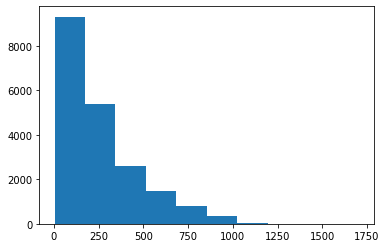

In [ ]:
#playlist length histogram(in minute)
length = RDD.map(lambda x: x['duration_ms']/(1000*60)).collect()
plt.hist(length)

In [ ]:
# num followers histogram
RDD.map(lambda x: x['num_followers']).histogram([0,1,2,4,6,8,10,50,10000])

([0, 1, 2, 4, 6, 8, 10, 50, 10000], [0, 14983, 4047, 577, 164, 83, 119, 27])

In [ ]:
ss.stop()
sc.stop()